18.1

Napisz poniższe funkcje aktywacji w języku Python i zobrazuj na wykresach ich funkcjonowanie.

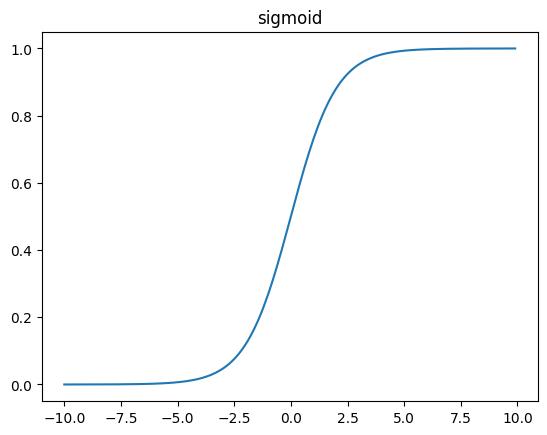

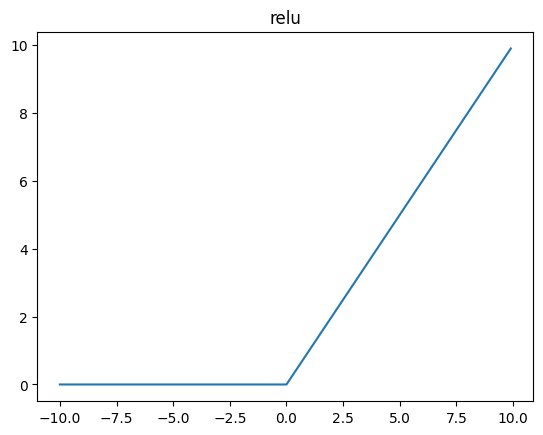

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

def ReLu(x):
    return np.maximum(0,x)

x = np.arange(-10, 10, 0.1)

yS = sigmoid(x)

yR = ReLu(x)

plt.title("sigmoid")
plt.plot(x, yS)
plt.show()

plt.title("relu")
plt.plot(x, yR)
plt.show()

18.2

Napisz funkcję która przyjmie jako parametr:

- stopień wielomianu
- wartość inicjalizującą X
- wektor stałych współczynników przy X

Zwracać funkcja powinna wartość gradientu.

Przykładowo dla wielomianu trzeciego rzędu: a+bx+cx^2
Pochodna po x zwrócić powinna wynik z: 0+b+2cx


In [7]:
import tensorflow as tf

def policz_gradient(stopien_wielomianu, wartosc_x, wspolczynniki):
    """
    Funkcja oblicza wartość gradientu (pochodnej po x) dla wielomianu o zadanym stopniu.

    Parametry:
    - stopien_wielomianu: int, stopień wielomianu
    - wartosc_x: float, wartość inicjalizująca zmienną x
    - wspolczynniki: lista lub wektor zawierający współczynniki [a0, a1, a2, ..., a_n]

    Zwraca:
    - wartość pochodnej wielomianu w punkcie wartosc_x
    """
    # Tworzymy zmienną x w tensorflow
    x = tf.Variable(wartosc_x, dtype=tf.float32)

    # Konwersja współczynników do tensorów stałych
    # Załóżmy, że wspolczynniki to lista o długości stopien_wielomianu+1
    # i odpowiadają a0, a1, a2, ..., a_n
    coeffs = [tf.constant(c, dtype=tf.float32) for c in wspolczynniki]

    # Używamy GradientTape do śledzenia operacji i wyznaczenia pochodnej
    with tf.GradientTape() as tape:
        # Informujemy tape, że chcemy śledzić zmienną x
        tape.watch(x)

        # Budujemy wyrażenie wielomianu: a0 + a1*x + a2*x^2 + ... + a_n*x^n
        wielomian = tf.add_n([coeffs[i] * tf.pow(x, i) for i in range(stopien_wielomianu+1)])

    # Obliczamy pochodną wielomianu po x
    grad = tape.gradient(wielomian, x)

    return grad.numpy()

# Przykład użycia:
# Dla wielomianu 2 stopnia: a + b*x + c*x^2
# stopien_wielomianu = 2
# wspolczynniki = [a, b, c]
# Wartosc gradientu dla x=2
# print(policz_gradient(2, 2.0, [1.0, 2.0, 3.0]))

18.3

Zadaniem jest zbudowanie i wytrenowanie modelu sekwencyjnego w Tensorflow do przewidywania wystąpienia cukrzycy na podstawie zbioru danych dostępnego w bibliotece scikit-learn.

In [8]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Wczytanie danych
X, y = load_diabetes(return_X_y=True)

# Normalizacja cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział danych na trening/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Budowa modelu sekwencyjnego
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # wartość ciągła
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='mse')

# Trenowanie modelu
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Ocena na zbiorze testowym
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test MSE:", test_loss)

# Predykcje na zbiorze testowym
y_pred = model.predict(X_test)

# Możemy na przykład sprawdzić, jak wygląda błąd średniokwadratowy po ponownym obliczeniu
mse = np.mean((y_test - y_pred.flatten())**2)
print("MSE liczone poza modelem:", mse)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 2s 31ms/step - loss: 33614.3398 - val_loss: 22237.9004
Epoch 2/100
9/9 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 10ms/step - loss: 30974.4922 - val_loss: 21988.1855
Epoch 3/100
9/9 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 9ms/step - loss: 30252.8281 - val_loss: 21674.0977
Epoch 4/100
9/9 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 8ms/step - loss: 31867.2402 - val_loss: 21265.6270
Epoch 5/100
9/9 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 9ms/step - loss: 29571.5117 - val_loss: 20736.2363
Epoch 6/100
9/9 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 10ms/step - loss: 27979.2773 - val_loss: 20064.3027
Epoch 7/100
9/9 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 10ms/step - loss: 28725.0273 - val_loss: 19232.8691
Epoch 8/100
9/9 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 10ms/step -

18.4

Utwórz notatnik w Google Colab, w którym zbudujesz prosty model klasyfikacyjny przy użyciu biblioteki Tensorflow. Wykorzystaj zbiór danych Breast Cancer, aby stworzyć model, który będzie klasyfikował przypadki raka piersi na podstawie cech komórek.

In [9]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Wczytanie danych
data = load_breast_cancer()
X = data.data
y = data.target

# Skalowanie cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Budowa modelu sekwencyjnego
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Klasyfikacja binarna, sigmoid
])

# Kompilacja modelu
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Trenowanie modelu
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Ocena na zbiorze testowym
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Predykcje
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("Procent poprawnych predykcji:", np.mean(y_pred.flatten() == y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 2s 20ms/step - accuracy: 0.7038 - loss: 0.6422 - val_accuracy: 0.7582 - val_loss: 0.6092
Epoch 2/50
12/12 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 5ms/step - accuracy: 0.8094 - loss: 0.5552 - val_accuracy: 0.9121 - val_loss: 0.5190
Epoch 3/50
12/12 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 6ms/step - accuracy: 0.9038 - loss: 0.4685 - val_accuracy: 0.9231 - val_loss: 0.4369
Epoch 4/50
12/12 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 4ms/step - accuracy: 0.9547 - loss: 0.3808 - val_accuracy: 0.9560 - val_loss: 0.3607
Epoch 5/50
12/12 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 6ms/step - accuracy: 0.9562 - loss: 0.3250 - val_accuracy: 0.9780 - val_loss: 0.2930
Epoch 6/50
12/12 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 4ms/step - accuracy: 0.9522 - loss: 0.2583 - val_accuracy: 0.9780 - val_loss: 0.2371
Epo